In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import scimap as sm
import matplotlib.pyplot as plt


Running SCIMAP  2.0.5


/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [175]:
file = 'TS-373_IMC22_B_001'


In [176]:
path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/merged_csv/{file}.csv'
df = pd.read_csv(path)
df.rename(columns={'centroid-0': 'Y_centroid', 'centroid-1': 'X_centroid', 'Object': 'CellID'}, inplace=True)
file_name_with_extension = path.split('/')[-1]
file_name = file_name_with_extension.split('.')[0]


In [177]:
df

,CellID,1,2,3,4,5,CD38,Perilipin,Vimentin,B4GALT1,...,191Ir,193Ir,6,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone
0,1,21634.755859,201.428853,252.710775,120.129335,0.824285,0.990154,0.166667,0.425927,0.000000,...,12.003897,15.409080,3.663318,6,0.500000,880.000000,3.265986,2.000000,0.790569,607.161428
1,2,21421.160156,124.260597,245.664563,110.908126,0.166667,5.217487,2.713602,13.895463,3.416214,...,9.954214,20.836672,2.594751,18,0.888889,619.166667,7.086920,3.235263,0.889717,628.458431
2,3,21298.032031,103.778473,241.119879,112.787502,0.200000,0.200000,0.100000,0.267872,0.000000,...,8.214091,10.890408,5.088470,10,0.800000,705.500000,4.098780,2.993326,0.683130,626.470271
3,4,21535.930246,170.788297,241.750839,113.712944,0.266108,4.464024,2.679972,27.555732,4.602456,...,14.977354,25.738770,3.510293,35,2.057143,391.914286,7.659947,5.981972,0.624604,473.169103
4,5,21603.864149,160.220366,248.394245,111.841698,1.004464,6.308298,0.624481,0.709505,0.853292,...,6.712848,12.107489,3.534178,9,1.000000,451.000000,3.265986,3.265986,0.000000,509.132596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,5210,23754.246094,61.046493,167.935375,78.168025,0.164995,8.419526,5.247825,22.613541,8.196009,...,10.256556,16.036969,2.009310,25,997.560000,673.120000,7.374269,4.220444,0.820030,21.377558
5210,5211,23616.646566,71.799041,167.303304,77.942268,0.264206,14.331616,3.163169,93.150873,11.214891,...,16.823663,28.039049,2.547172,24,997.750000,995.875000,7.705062,4.006080,0.854210,105.650367
5211,5212,24018.071615,66.145272,170.687706,84.462585,0.210007,4.323855,2.840481,1.619479,3.888553,...,15.067144,29.840963,0.897768,12,998.166667,195.416667,5.176698,2.940449,0.823017,106.004717
5212,5213,23858.534058,77.775059,170.993088,78.799484,0.437907,10.046507,3.717815,31.736003,8.284039,...,8.684897,17.142875,2.522647,16,998.125000,757.500000,6.324555,3.122499,0.869626,29.154759


In [178]:
batch = pd.read_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/batch_corrected_combat/{file}.csv')
batch['Unnamed: 0'] = batch['Unnamed: 0'].astype(str)
batch["CellID"] = batch['Unnamed: 0'].str.split(' ', expand=True)[1]
batch.drop(columns=['Unnamed: 0'], inplace=True)
batch['CellID'] = batch['CellID'].astype(int)

In [181]:
batch

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,GranzymeB,Ki67,CollagenTypeI,CD3,CPT1A,CD98,HLA-DR,ST6GAL1,CD138,CellID
0,0.605904,-0.251036,0.836621,0.198625,-0.466287,-0.025747,0.358489,-0.015643,-0.250576,-0.039898,...,-0.786354,-0.851925,-0.042065,0.682620,0.183954,0.056087,-0.271691,-0.059179,0.481659,1
1,1.768931,1.046249,2.615967,1.478032,1.818461,0.638786,1.513949,0.499205,3.286722,2.294626,...,1.732778,0.569073,0.109705,0.971248,3.051534,1.666574,1.702940,1.670352,1.531487,2
2,0.074855,-0.306055,0.745435,0.198625,-0.622113,-0.025747,0.358489,0.046460,-0.162234,0.075709,...,0.007517,-0.617974,-0.089649,-0.262232,0.371746,0.123110,-0.077189,0.072692,0.604604,3
3,1.648914,1.036512,3.033725,1.668313,1.791347,0.346839,1.837623,0.177310,2.185851,2.511740,...,1.982010,0.267563,0.381372,0.821508,2.485695,1.924391,1.929140,1.912274,1.180340,4
4,1.915909,0.101876,0.987204,0.708258,1.766871,0.098169,0.654792,0.053333,0.650006,0.261121,...,1.553150,-0.764188,-0.077005,0.702883,1.055700,0.492956,0.261879,1.341266,0.481659,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,2.140660,1.575994,2.913043,2.043195,2.132683,0.597197,2.587155,0.702614,2.834758,2.484932,...,2.194560,0.928548,1.155185,2.076549,2.950890,2.076290,2.075503,2.417892,1.382786,5210
5208,2.556900,1.167040,3.777792,2.248614,3.733307,1.306700,3.015700,0.752804,2.044156,2.011275,...,3.341872,1.748091,0.603422,1.821025,3.300792,2.173955,2.123248,2.535489,1.476755,5211
5209,1.624466,1.082050,1.353109,1.560284,0.850396,0.110768,1.714062,0.141465,1.180893,1.172364,...,0.845755,3.102760,1.006967,1.256417,2.634372,1.757440,1.917712,2.310684,0.980988,5212
5210,2.278692,1.296180,3.119979,2.050180,2.915092,0.988049,2.570909,0.612175,3.173384,2.550596,...,2.605724,2.023181,1.167732,1.658183,2.836862,2.413900,2.108339,1.904946,1.828696,5213


In [159]:
common_columns = df.columns.intersection(batch.columns).tolist()
common_columns.remove('CellID')
merged_df = df.merge(batch, on='CellID', suffixes=('', '_batch'))
for col in common_columns:
    merged_df[col] = merged_df[col + '_batch'].combine_first(merged_df[col])
    merged_df.drop(columns=[col + '_batch'], inplace=True)

In [160]:
df = merged_df

In [162]:
export = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/phenotyping_{file_name}.csv'
df.to_csv(export, header=True, index=False)

In [163]:
df = pd.read_csv(export)

In [164]:
adata = sm.pp.mcmicro_to_scimap(export,split="area", CellId="CellID", drop_markers = ["HistoneH3", " 1", " 2", " 3", " 4", " 5", " 6", "191Ir", "193Ir"])

Loading phenotyping_TS-373_IMC22_B_001.csv


In [123]:
adata.raw.X

array([[ 1.88237559,  1.22974422,  3.87527294, ...,  0.88915438,
         1.30236146,  0.0101182 ],
       [ 1.90274463,  2.39418477,  3.7363489 , ...,  1.42197423,
         2.39162406,  0.56438456],
       [ 2.90785412,  1.05194645,  1.8642022 , ...,  1.85772517,
         2.68646718,  2.90024885],
       ...,
       [ 2.52343747,  1.98526046,  3.25655215, ...,  1.69227027,
         3.97057874,  2.84832933],
       [ 0.86529339,  0.54230786,  1.6602671 , ...,  0.56593403,
         1.16755575, -0.3800824 ],
       [ 2.91574147,  1.75534039,  2.64072641, ...,  2.12043253,
         2.49384278,  2.05244759]])

In [124]:
adata

AnnData object with n_obs × n_vars = 7683 × 33
    obs: 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [165]:
np.isnan(adata.X.data).any()

True

In [170]:
X_dense = adata.X

# Check each column for NaNs
for i in range(X_dense.shape[1]):
    if np.any(np.isnan(X_dense[:, i])):
        print(f"Column {i} contains NaN values")

Column 13 contains NaN values
Column 23 contains NaN values


In [171]:
nan_columns = []
for i in range(adata.X.shape[1]):
    if np.any(np.isnan(adata.X[:, i])):
        nan_columns.append(adata.var_names[i])

# Print the names of the columns containing NaN values
if len(nan_columns) > 0:
    print("Columns containing NaN values:")
    for name in nan_columns:
        print(name)
else:
    print("No columns contain NaN values.")

Columns containing NaN values:
CD36
GLUT1


In [166]:
image_path = '/'.join(path.split(sep="/")[:9]) + f"/img/{file_name}.tiff"
mask_path = '/'.join(path.split(sep="/")[:9]) + f"/masks/{file_name}.tiff"

In [167]:
marker_of_interest = 'CD45'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD98'], point_size=3, 
                   seg_mask = mask_path)
# 1.2

In [16]:
marker_of_interest = 'CD3'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138', 'CD8', 'CD4'], point_size=3, 
                   seg_mask = mask_path)
#  1.3

In [9]:
marker_of_interest = 'CD4'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138','CD8'], point_size=3, 
                   seg_mask = mask_path)
#  1.4

In [151]:
marker_of_interest = 'CD8'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD4' ], point_size=3, 
                   seg_mask = mask_path)
#  2.1

In [152]:
marker_of_interest = 'CD68'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138', 'CD11b'], point_size=3, 
                   seg_mask = mask_path)
#  2.5

In [11]:
marker_of_interest = 'CD11b'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138', 'MPO', 'CD68'], point_size=3, 
                   seg_mask = mask_path)
#  1.6

In [12]:
marker_of_interest = 'CD11c'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'HLA-DR'], point_size=3, 
                   seg_mask = mask_path)
#  0.6

In [153]:
marker_of_interest = 'HLA-DR'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'CD11c', 'CD68', 'CD11b'], point_size=3, 
                   seg_mask = mask_path)
#  1.4

In [85]:
marker_of_interest = 'CathepsinK'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
#  1.7

In [18]:
marker_of_interest = 'MPO'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD68', 'CD11b', 'CD45'], point_size=3, 
                   seg_mask = mask_path)
#  2.3

In [15]:
marker_of_interest = 'CD138'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD38', "CD68", "MPO"], point_size=3, 
                   seg_mask = mask_path)
#  1.0

In [36]:
marker_of_interest = 'CD38'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 1.7

In [226]:
marker_of_interest = 'CD34'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 0.7

In [91]:
marker_of_interest = 'RUNX2'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
# 0.8

In [88]:
marker_of_interest = 'Perilipin'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 1.8

In [93]:
marker_of_interest = 'CD36'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 2.5

In [107]:
manual_gate = pd.read_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/uncorrected/standard/{file}_manual_gates_scimap.csv')
#manual_gate = pd.read_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/Phenotypes/final_test_data/used/standard/{file}_manual_gates_scimap.csv')
adata = sm.pp.rescale (adata, gate=manual_gate)

/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:100: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



GMM for ['phenotyping_TS-373_IMC07_UB_001']
Finding the optimal gate by GMM for Perilipin
Finding the optimal gate by GMM for Vimentin
Finding the optimal gate by GMM for B4GALT1
Finding the optimal gate by GMM for ATP5A
Finding the optimal gate by GMM for HIF1A
Finding the optimal gate by GMM for CS
Finding the optimal gate by GMM for IL32
Finding the optimal gate by GMM for IDO
Finding the optimal gate by GMM for GranzymeK
Finding the optimal gate by GMM for PKM2
Finding the optimal gate by GMM for IRF4
Finding the optimal gate by GMM for GLUT1
Finding the optimal gate by GMM for GranzymeB
Finding the optimal gate by GMM for Ki67
Finding the optimal gate by GMM for CollagenTypeI
Finding the optimal gate by GMM for CPT1A
Finding the optimal gate by GMM for CD98
Finding the optimal gate by GMM for ST6GAL1
Scaling Image phenotyping_TS-373_IMC07_UB_001
Scaling CD38
Scaling Perilipin
Scaling Vimentin
Scaling B4GALT1
Scaling MPO
Scaling CathepsinK
Scaling ATP5A
Scaling RUNX2
Scaling HIF1A


ValueError: An exception occurred: CD138 has nan values

In [25]:
%%capture
phenotype = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Phenotyping/scimap/phenotyping_scheme_scimap.csv')
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

In [26]:
adata.obs['phenotype'].value_counts()

phenotype
Plasma Cells/MM cells              5515
CD8+Tcells                          534
Unknown                             339
Neutrophils                         289
CD45+                               222
Others                              134
MPO+                                127
CD4+Tcells                          126
Endothelial cells                   105
Adipocytes                           92
CD68+                                90
HSCs                                 42
Osteoclasts                          26
activated Macrophages/Monocytes      21
Macrophages/Monocytes                15
Osteoblasts                           7
Dendritic Cells                       4
Name: count, dtype: int64

In [27]:
adata.obs['phenotype'].value_counts()

phenotype
Plasma Cells/MM cells              5515
CD8+Tcells                          534
Unknown                             339
Neutrophils                         289
CD45+                               222
Others                              134
MPO+                                127
CD4+Tcells                          126
Endothelial cells                   105
Adipocytes                           92
CD68+                                90
HSCs                                 42
Osteoclasts                          26
activated Macrophages/Monocytes      21
Macrophages/Monocytes                15
Osteoblasts                           7
Dendritic Cells                       4
Name: count, dtype: int64

In [65]:
sm.pl.image_viewer (image_path, adata, overlay = 'phenotype', point_color='white', point_size=3, seg_mask = mask_path)

In [90]:
adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')

In [91]:
sc.tl.dendrogram(adata, groupby='phenotype')

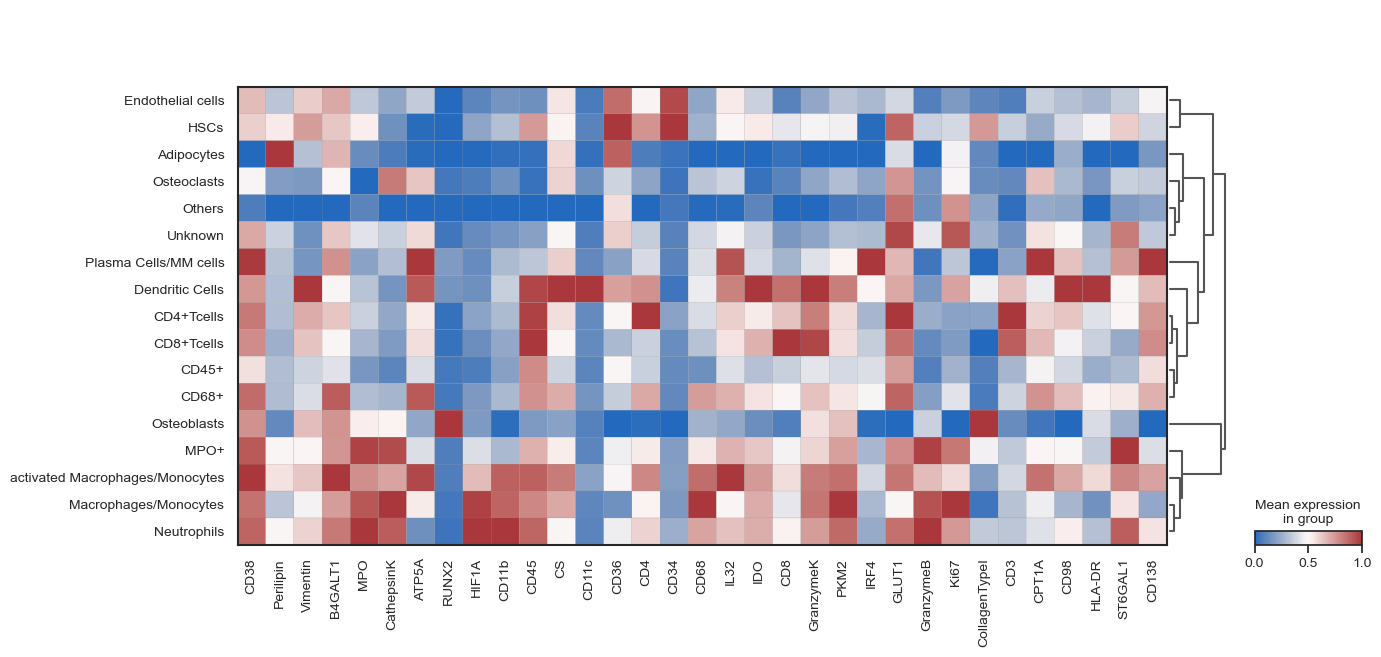

In [92]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [14]:
adata = sm.tl.umap(adata)

/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:267: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



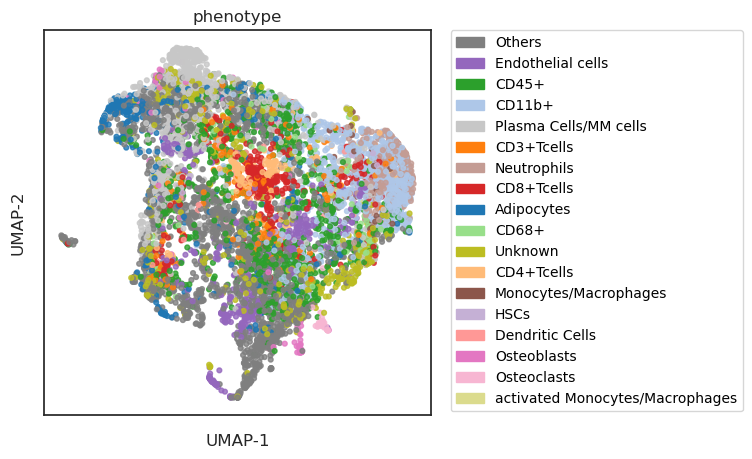

In [15]:
sm.pl.umap(adata, color=['phenotype'])

In [23]:


# OPTIONAL! Remove unwanted categories
categories_to_remove = ["Osteoclasts"]#, "Unknown" "Others"]


adata = adata[~adata.obs['phenotype'].isin(categories_to_remove)]

In [66]:
#adata.write(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/standard/{file_name}standard.h5ad')
adata.write(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/uncorrected/standard/{file_name}standard.h5ad')

In [120]:
manual_gate.to_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/standard/{file}_manual_gates_scimap.csv', index=False)